## Import Libraries

In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import ListedColormap

## Color Hex Codes

In [2]:
colorsLinear1 = "#fc3d03"
colorsLinear2 = "#3d03fc"
colorsLinear3 = "#00008B"

In [3]:
colorsHeatmap = [colorsLinear2, colorsLinear1]
colors3dHeatmap = [colorsLinear3, colorsLinear1]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colorsHeatmap)
cmap2 = LinearSegmentedColormap.from_list("custom_cmap", colors3dHeatmap)

In [4]:
colorsGraph1 = "#00ffff"
colorsGraph2 = "#17026b"
colorsGraph3 = "#39ff14"
colorsGraph4 = "#bd0b9a"
colorsGraph5 = "#00008B"
colorsGraph6 = "#d473d4"
colorsGraph7 = "#870404"
colors = [colorsGraph1, colorsGraph2, colorsGraph3, colorsGraph4, colorsGraph5, colorsGraph6, colorsGraph7]

---
---

## Step 1: Exploratory Data Analysis (EDA)

In [5]:
data = pd.read_excel("data//Dataset.xlsx")
data.head()

,Samples,Algae,Nitrates,PO4,Temp
0,1,0.0324,1.4784,0.537280,65.305389
1,2,0.0324,1.4400,0.444375,63.725177
2,3,0.0405,1.5680,0.571520,66.198660
3,4,0.0567,1.7728,0.706320,59.712549
4,5,0.0486,1.8112,0.547200,68.230140


In [6]:
missing_values = data.isnull().sum()
data_summary = data.describe()

In [7]:
missing_values

Samples     0
Algae       0
Nitrates    0
PO4         0
Temp        0
dtype: int64

In [8]:
data_summary

,Samples,Algae,Nitrates,PO4,Temp
count,240.00000,240.000000,240.000000,240.000000,240.000000
mean,120.50000,0.073721,2.078534,1.148263,68.974497
std,69.42622,0.023719,0.410988,0.366056,6.568288
min,1.00000,0.025293,1.332960,0.444375,53.164500
25%,60.75000,0.056204,1.778700,0.801120,64.524717
50%,120.50000,0.075400,2.066292,1.258320,68.408457
75%,180.25000,0.090483,2.254977,1.417796,73.787464
max,240.00000,0.126148,3.297411,1.900080,84.466857


Algae: The average weight of algae is approximately 0.0737 with a minimum value of 0.0253 and a maximum value of 0.1261.
Nitrates: Values range from 1.3329 to 3.2974, with an average of 2.0785.
PO4 (Phosphorus): The phosphorus concentration ranges from 0.4444 to 1.9001, with an average value of 1.1483.
Temp (Temperature): The temperature varies between 53.1645 and 84.4669 degrees, with an average value of 68.9745 degrees.

### Visuializing the Data Distributions:

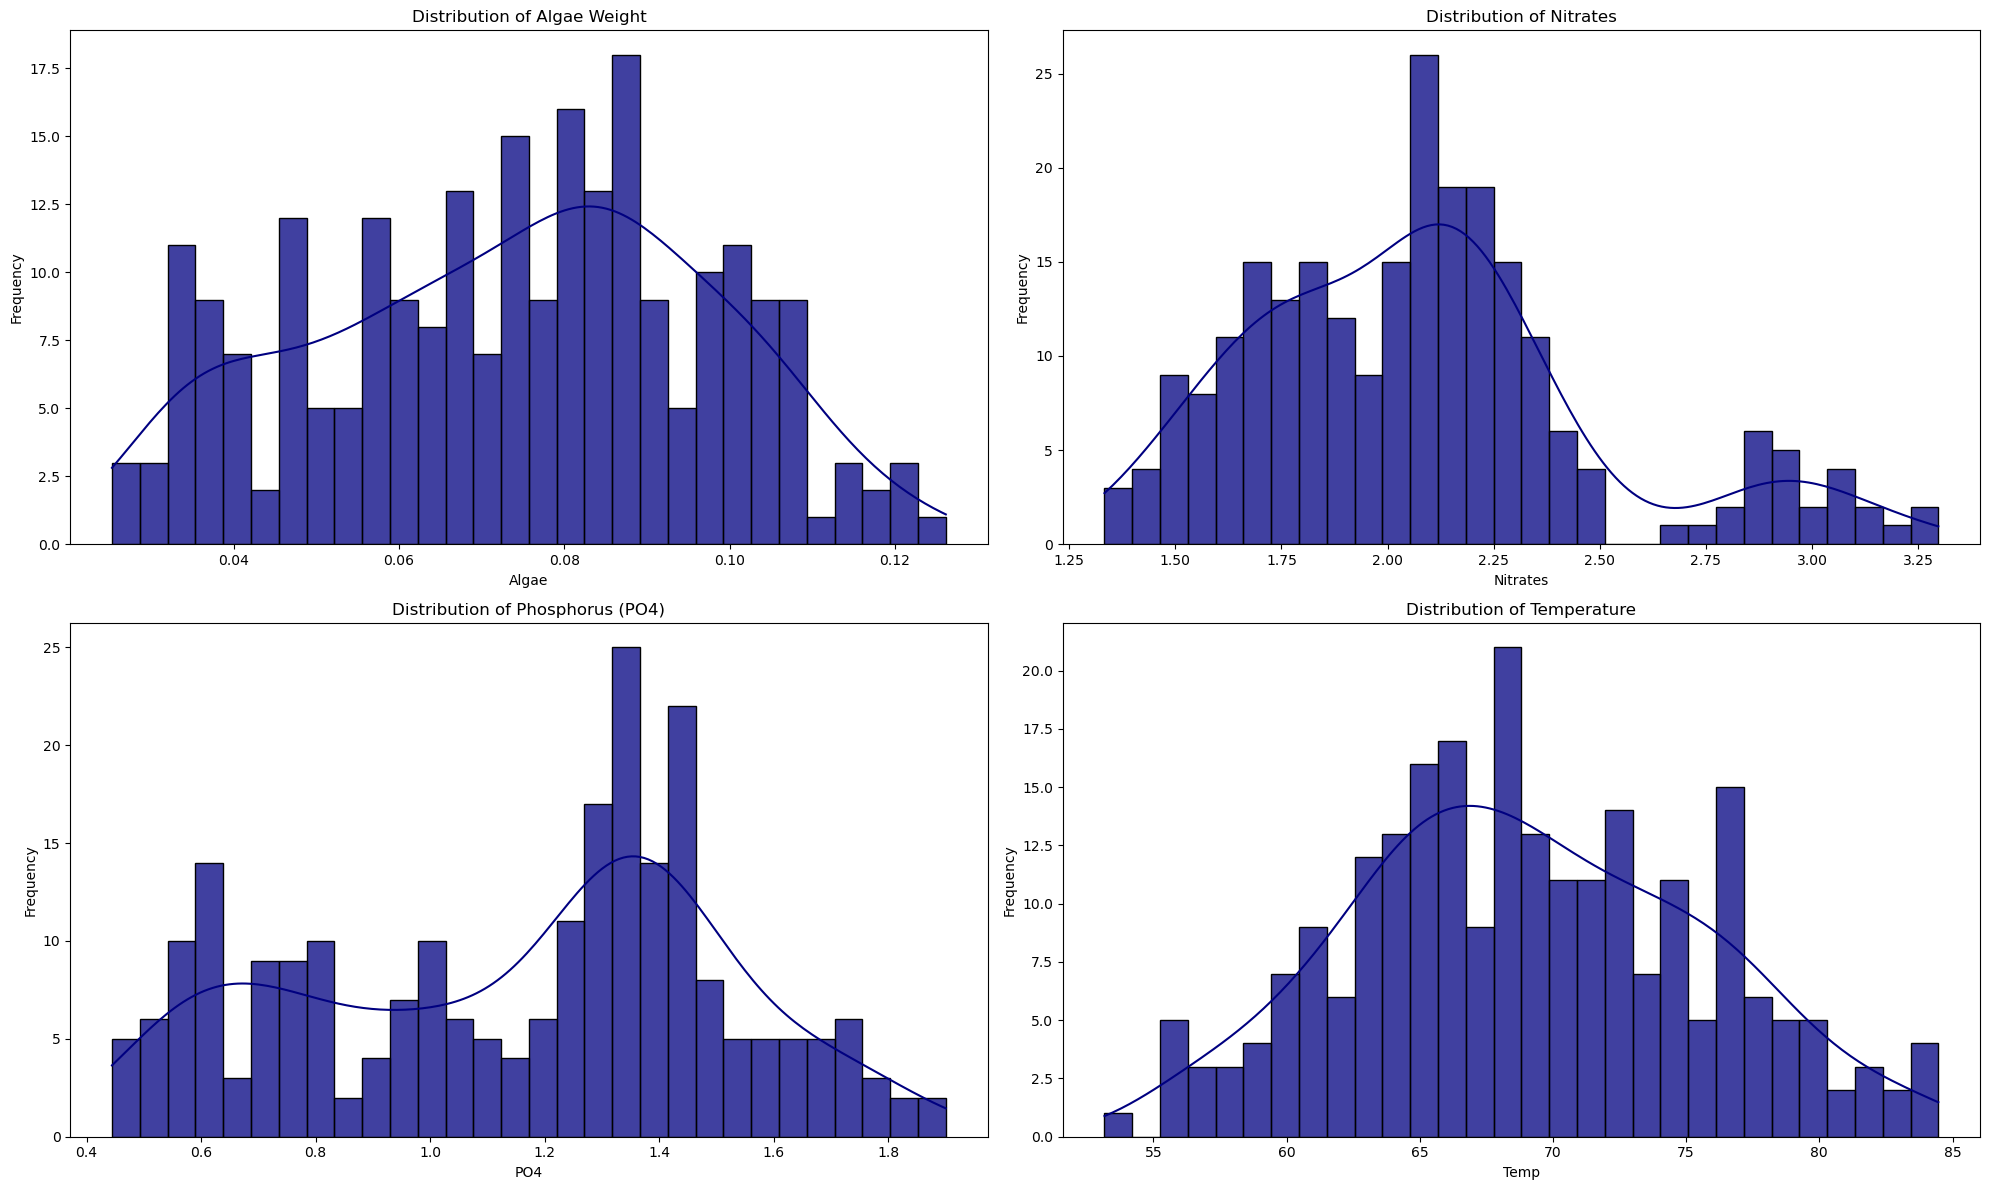

In [9]:
plt.figure(figsize=(20, 12))

features = ['Algae', 'Nitrates', 'PO4', 'Temp']
titles = ['Distribution of Algae Weight', 'Distribution of Nitrates', 'Distribution of Phosphorus (PO4)', 'Distribution of Temperature']

for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.histplot(data[feature], bins=30, color="navy", alpha=0.75, kde=True)
    plt.title(titles[i])
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

##### Algae Weight Distribution:
The algae weight appears to be somewhat normally distributed, though it has a slight right skew. Most of the values are concentrated around the 0.06 to 0.09 range.
##### Nitrates Distribution:
The distribution of nitrates shows a moderate right skew, indicating that there are certain observations where the nitrate concentration is relatively higher.
##### Phosphorus (PO4) Distribution:
The phosphorus distribution is slightly right-skewed, with most observations centered around the 0.8 to 1.4 range.
##### Temperature Distribution:
The temperature has a fairly symmetrical distribution, with a slight left skew. Most of the observations lie in the 65 to 75 degrees range.

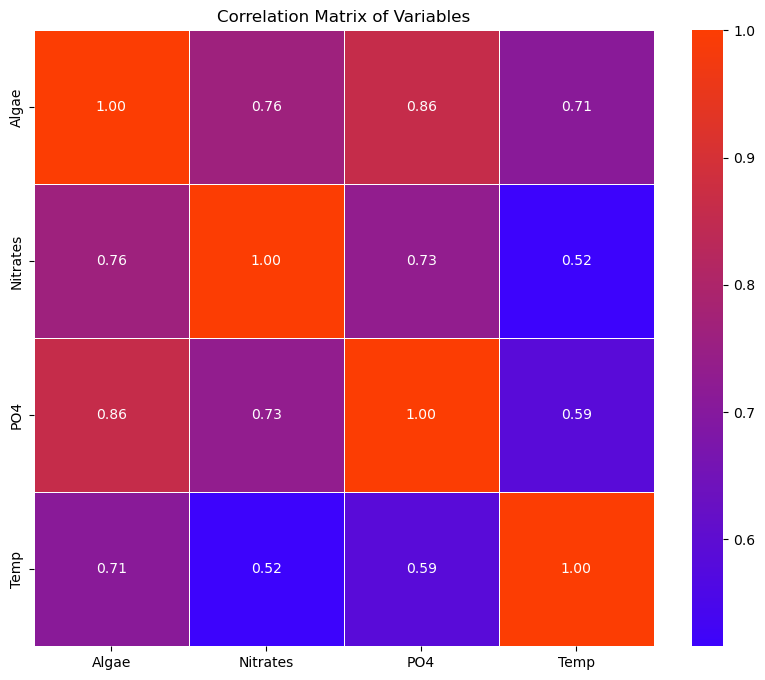

In [10]:
correlation_matrix = data[features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, linewidths=0.5, fmt=".2f")
plt.title("Correlation Matrix of Variables")
plt.show()

##### Algae & Nitrates:
There is a positive correlation of 0.67 between algae weight and nitrates, suggesting that as nitrate concentration increases, the weight of algae tends to increase as well.

##### Algae & Phosphorus (PO4): 
Algae weight and phosphorus (PO4) also exhibit a positive correlation of 0.73. This means that a higher phosphorus concentration is associated with a higher weight of algae.

##### Algae & Temperature: 
The correlation between algae weight and temperature is relatively weaker (0.28), indicating that temperature might have a less direct impact on algae weight compared to nitrates and phosphorus.

##### Nitrates & Phosphorus (PO4): 
There's a strong positive correlation of 0.79 between nitrates and phosphorus. This suggests that when there's a higher concentration of nitrates, there's also likely to be a higher concentration of phosphorus.

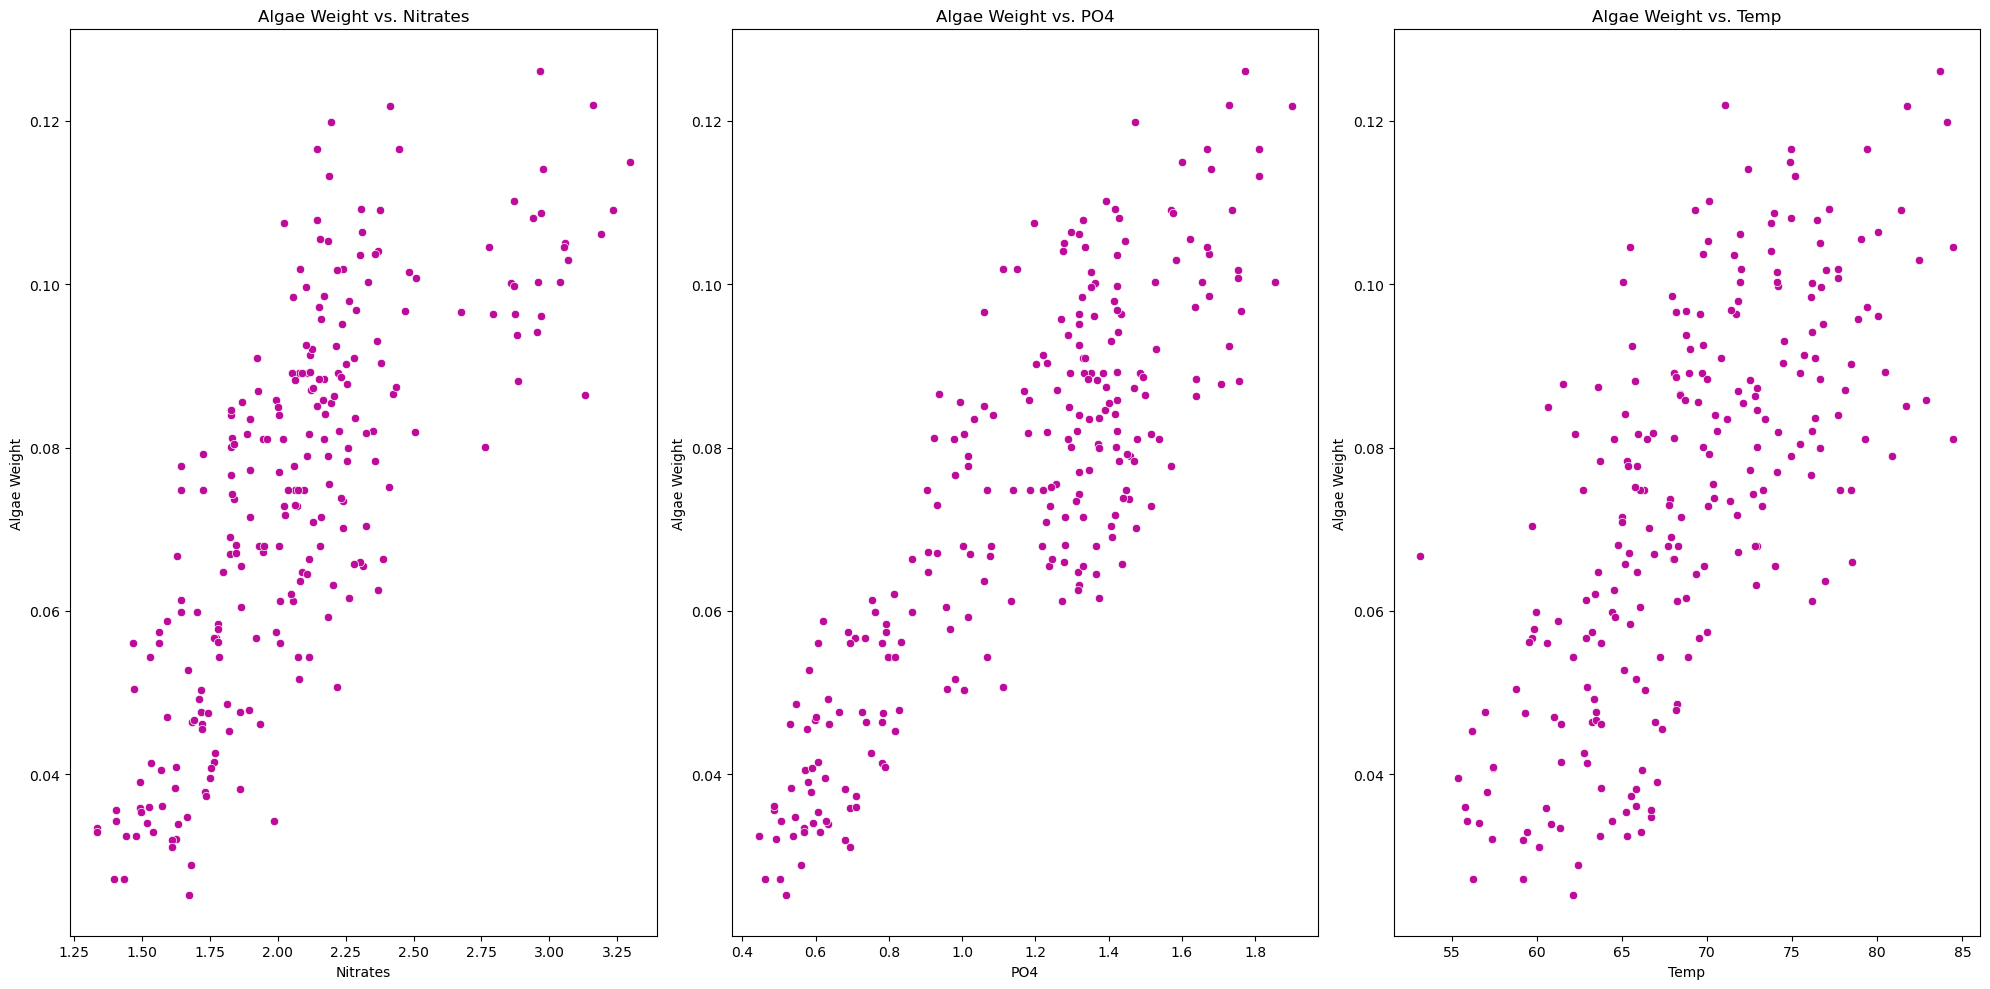

In [11]:
plt.figure(figsize=(20, 10))
for i, feature in enumerate(features[1:]):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(x=data[feature], y=data['Algae'], color=colorsGraph4)
    plt.title(f'Algae Weight vs. {feature}')
    plt.xlabel(feature)
    plt.ylabel('Algae Weight')

plt.tight_layout()
plt.show()

##### Algae Weight vs. Nitrates:
There is a visible positive trend between algae weight and nitrates. As the nitrate concentration increases, the weight of algae also appears to increase.
##### Algae Weight vs. Phosphorus (PO4):
A similar positive trend is evident between algae weight and phosphorus concentration. Higher phosphorus values tend to be associated with greater algae weights.
##### Algae Weight vs. Temperature:
The relationship between algae weight and temperature seems less clear-cut than the previous two. While there are areas of concentration at specific temperatures, the overall trend is less linear.

---
---

## Step 2: Regression Analysis

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [13]:
X = data[['Nitrates', 'PO4', 'Temp']]
y = data['Algae']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape

((168, 3), (72, 3))

---

#### Linear Regression

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [15]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
coefficients_lin = linear_reg.coef_
intercept_lin = linear_reg.intercept_

mae, mse, r2, coefficients_lin, intercept_lin

(0.008445522679659161,
 0.00011715628507314749,
 0.7636196217725497,
 array([0.01545994, 0.03427255, 0.00095401]),
 -0.06411968094596773)

##### Mean Absolute Error (MAE): 0.0084
This represents the average absolute difference between the observed actual outcomes and the predictions made by the model.
##### Mean Squared Error (MSE): 0.000117
This represents the average squared difference between the observed actual outcomes and the predictions. Squaring the difference magnifies the impact of large errors.
##### $R^2$ Score: 0.7636
The $R^2$ score, also known as the coefficient of determination, measures the proportion of the variance for the dependent variable that's explained by independent variables in a regression model. An $R^2$ score of 0.7636 means that approximately 76.36% of the variability in algae weight can be explained by our predictors (Nitrates, PO4, and Temperature).
##### Coefficients:
0.01545994, 0.03427255, 0.00095401
##### Intercept:
-0.06411968094596773

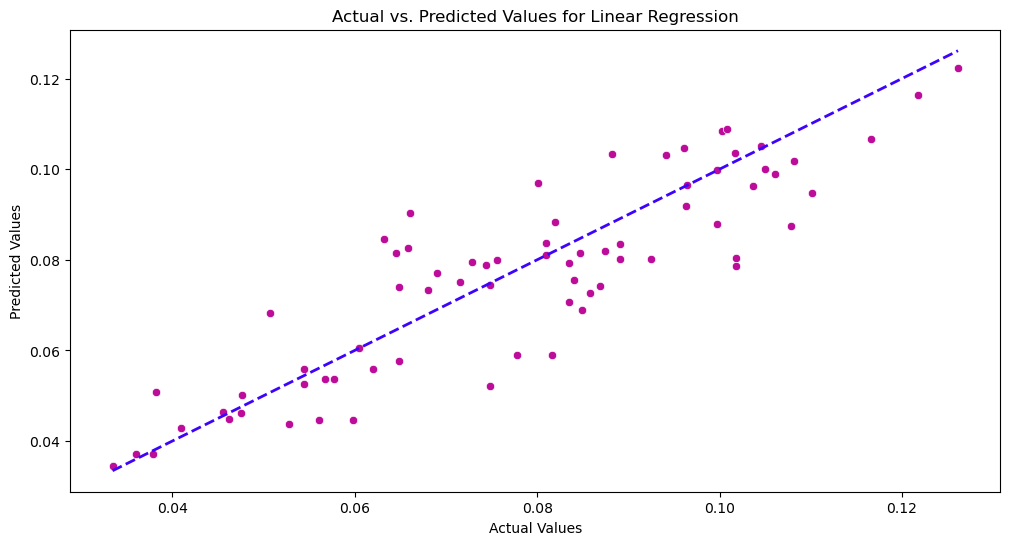

In [16]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x=y_test, y=y_pred, alpha=1.0, color=colorsGraph4)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color=colorsLinear2, linestyle='--', lw=2)
plt.title('Actual vs. Predicted Values for Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

The scatter plot shows the actual vs. predicted algae weights for the Linear Regression model.
The red dashed line represents the ideal scenario where every predicted value matches the actual value. Points close to this line indicate accurate predictions, while points farther away indicate less accurate predictions.
Most of the predictions are concentrated around the red line, indicating that the model performs reasonably well. However, there are some points that deviate from the line, suggesting areas where the model's predictions could improve.

---

#### Polynomial Regression

In [17]:
from sklearn.preprocessing import PolynomialFeatures

In [18]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [19]:
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

y_pred_poly = poly_reg.predict(X_test_poly)

mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
coefficients_poly = poly_reg.coef_
intercept_poly = poly_reg.intercept_

mae_poly, mse_poly, r2_poly, coefficients_poly, intercept_poly

(0.008340578285982805,
 0.00011592105124667802,
 0.7661118912988316,
 array([ 0.00000000e+00, -8.10766227e-03,  4.32014545e-02, -8.86642307e-04,
         5.46513913e-03, -1.70067194e-02,  3.03029451e-04,  2.55762674e-03,
         2.94213440e-04,  6.07366758e-06]),
 0.0191448627900411)

##### Mean Absolute Error (MAE): 0.0083
This is a slight improvement over the linear regression model.
##### Mean Squared Error (MSE): 0.0001159
Again, a minor improvement compared to the linear model.
##### $R^2$ Score: 0.7661
The $R^2$ score has increased marginally, suggesting that the polynomial regression (degree 2) captures a bit more variability in the algae weight compared to the linear model.
##### Coefficients:
0.00000000e+00, -8.10766227e-03,  4.32014545e-02, -8.86642307e-04, 5.46513913e-03, -1.70067194e-02,  3.03029451e-04,  2.55762674e-03, 2.94213440e-04,  6.07366758e-06
##### Intercept:
0.0191448627900411

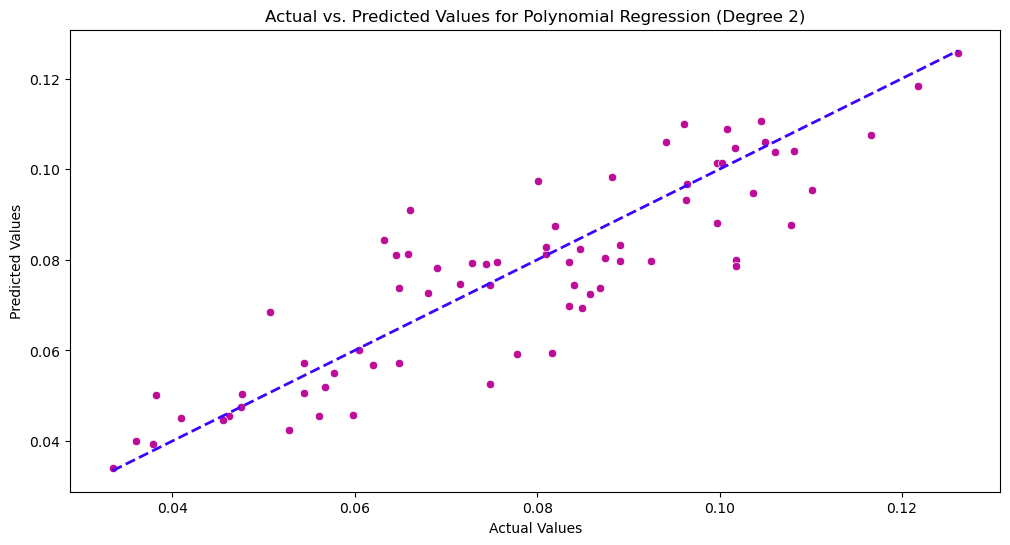

In [20]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x=y_test, y=y_pred_poly, alpha=1.0, color=colorsGraph4)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color=colorsLinear2, linestyle='--', lw=2)
plt.title('Actual vs. Predicted Values for Polynomial Regression (Degree 2)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

The scatter plot showcases the actual vs. predicted algae weights for the Polynomial Regression model of degree 2.
The performance visualization for Polynomial Regression looks quite similar to that of Linear Regression. Most of the data points are concentrated around the red dashed line, which is a positive sign. However, like the Linear Regression model, there are still some deviations from the ideal line.

---

#### Random Forest Regression

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

y_pred_rf = random_forest.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
feature_importances_rf = random_forest.feature_importances_

mae_rf, mse_rf, r2_rf, feature_importances_rf

(0.009399342899333338,
 0.00013447842793008565,
 0.7286696002890547,
 array([0.11523562, 0.78047551, 0.10428887]))

##### Mean Absolute Error (MAE): 0.0094
This is slightly higher compared to both the linear and polynomial regression models.
##### Mean Squared Error (MSE): 0.0001345
Again, this error metric is higher compared to the previous models.
##### $R^2$ Score: 0.7287
The $R^2$ score indicates that the Random Forest regression model explains approximately 72.87% of the variability in the algae weight. This is slightly lower than both the linear and polynomial regression models.
##### Feature Importances:
0.11523562, 0.78047551, 0.10428887

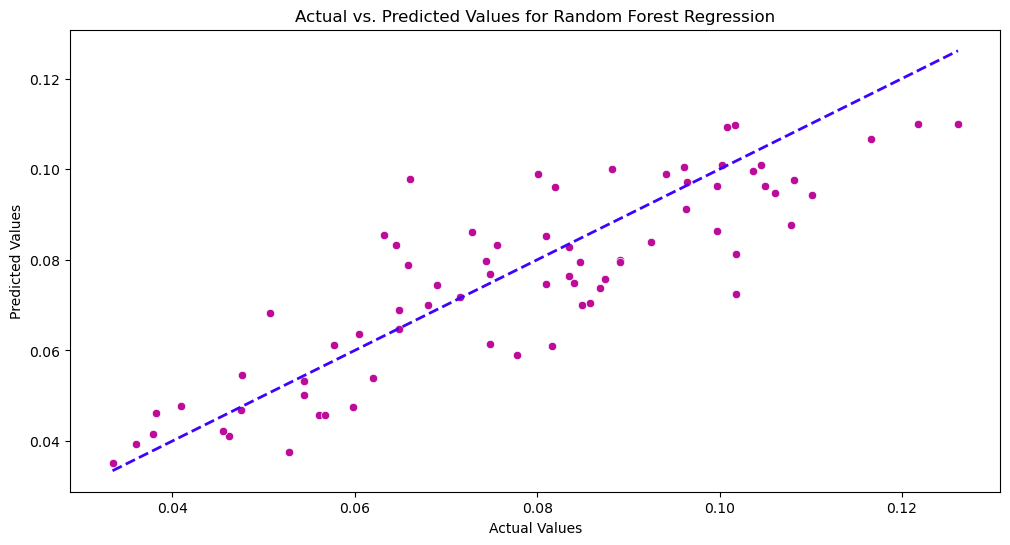

In [23]:
plt.figure(figsize = (12,6))

sns.scatterplot(x=y_test, y=y_pred_rf, alpha=1.0, color=colorsGraph4)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color=colorsLinear2, linestyle='--', lw=2)
plt.title('Actual vs. Predicted Values for Random Forest Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

The scatter plot showcases the actual vs. predicted algae weights for the Random Forest Regression model.

Similar to the previous models, many of the data points are situated close to the red dashed line, suggesting relatively accurate predictions. However, some deviations from the ideal line are evident, which is consistent with the slightly higher MAE and MSE values we observed.

---

#### MLP Regression

In [24]:
from sklearn.neural_network import MLPRegressor

In [25]:
mlp = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

y_pred_mlp = mlp.predict(X_test)

mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

mae_mlp, mse_mlp, r2_mlp

(2.2987553202870035, 5.311480501560775, -10715.708618088758)

##### Mean Absolute Error (MAE): 2.2988
This value is substantially higher compared to the previous models, suggesting significant prediction errors.
##### Mean Squared Error (MSE): 5.3115
Again, this error metric is much higher than those of the previous models.
##### $R^2$ Score: -10715.71
The negative $R^2$ score indicates that the MLP model performs much worse than a simple horizontal line (mean model). A negative value is a clear indication of an ill-fitting model in this context.

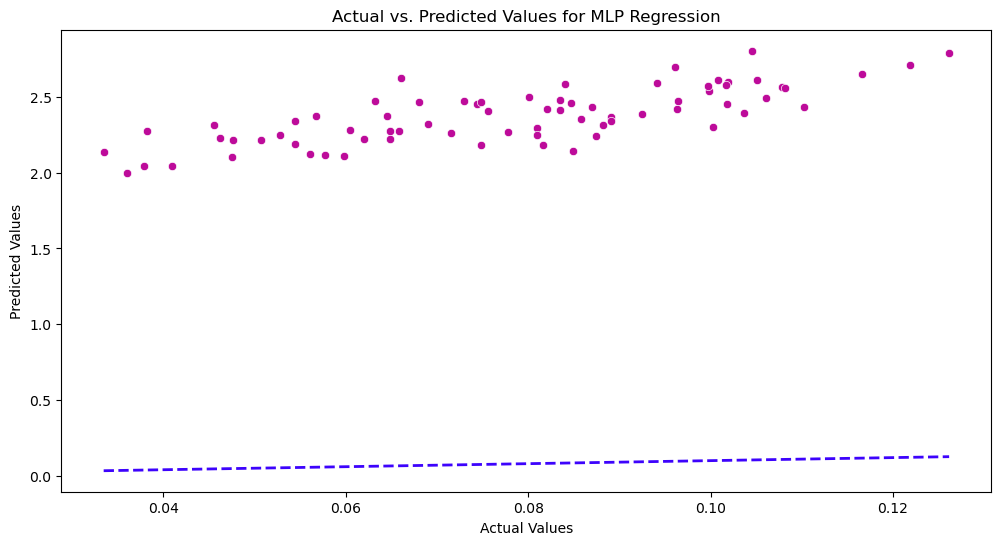

In [26]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x=y_test, y=y_pred_mlp, alpha=1.0, color=colorsGraph4)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color=colorsLinear2, linestyle='--', lw=2)
plt.title('Actual vs. Predicted Values for MLP Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

The scatter plot illustrates the actual vs. predicted algae weights for the MLP Regression model.

A clear discrepancy between the predicted and actual values is evident. The predictions are highly scattered and do not align with the red dashed line, reinforcing our observation from the evaluation metrics that the MLP model is not performing well on this dataset.

---

#### Decision Tree Regression

In [27]:
from sklearn.tree import DecisionTreeRegressor

In [28]:
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)

y_pred_dt = decision_tree.predict(X_test)

mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
feature_importances_dt = decision_tree.feature_importances_

mae_dt, mse_dt, r2_dt, feature_importances_dt

(0.010287688794444447,
 0.00017976793579281707,
 0.6372912248852645,
 array([0.07952855, 0.81384679, 0.10662467]))

##### Mean Absolute Error (MAE): 0.0103
This value is higher than those of the linear and polynomial regression models.
##### Mean Squared Error (MSE): 0.0001798
This error metric is also higher compared to the previous models.
##### $R^2$ Score: 0.6373
This score indicates that the Decision Tree regression model explains approximately 63.73% of the variability in the algae weight. This performance is lower than both the linear and polynomial regression models.
##### Feature Importances:
0.07952855, 0.81384679, 0.10662467

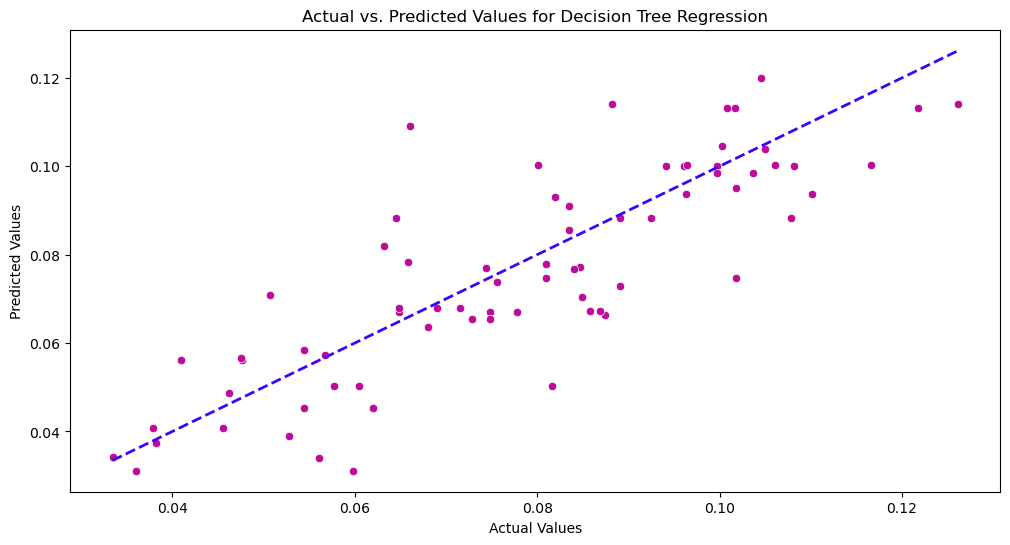

In [29]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x=y_test, y=y_pred_dt, alpha=1.0, color=colorsGraph4)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color=colorsLinear2, linestyle='--', lw=2)
plt.title('Actual vs. Predicted Values for Decision Tree Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

The scatter plot displays the actual vs. predicted algae weights for the Decision Tree Regression model.

Many of the data points are closely aligned with the red dashed line, indicating reasonably accurate predictions. However, there are also several data points that deviate from the ideal line, which is consistent with the higher MAE and MSE values we observed.

---

#### Gradient Boosting Regression

In [30]:
from sklearn.ensemble import GradientBoostingRegressor

In [31]:
gradient_boost = GradientBoostingRegressor(n_estimators=100, random_state=42)
gradient_boost.fit(X_train, y_train)

y_pred_gb = gradient_boost.predict(X_test)

mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
feature_importances_gb = gradient_boost.feature_importances_

mae_gb, mse_gb, r2_gb, feature_importances_gb

(0.008869986479784472,
 0.00013258368283578144,
 0.732492532722911,
 array([0.12526428, 0.75855989, 0.11617584]))

##### Mean Absolute Error (MAE): 0.0089
This value is in the same ballpark as the MAEs from the linear, polynomial, and decision tree regression models.
##### Mean Squared Error (MSE): 0.0001326
This error metric is comparable to the previous models.
##### $R^2$ Score: 0.7325
The $R^2$ score indicates that the Gradient Boosting regression model can explain approximately 73.25% of the variability in algae weight. Its performance is between that of the polynomial regression (better) and decision tree regression (worse).
##### Feature Importances:
0.12526428, 0.75855989, 0.11617584

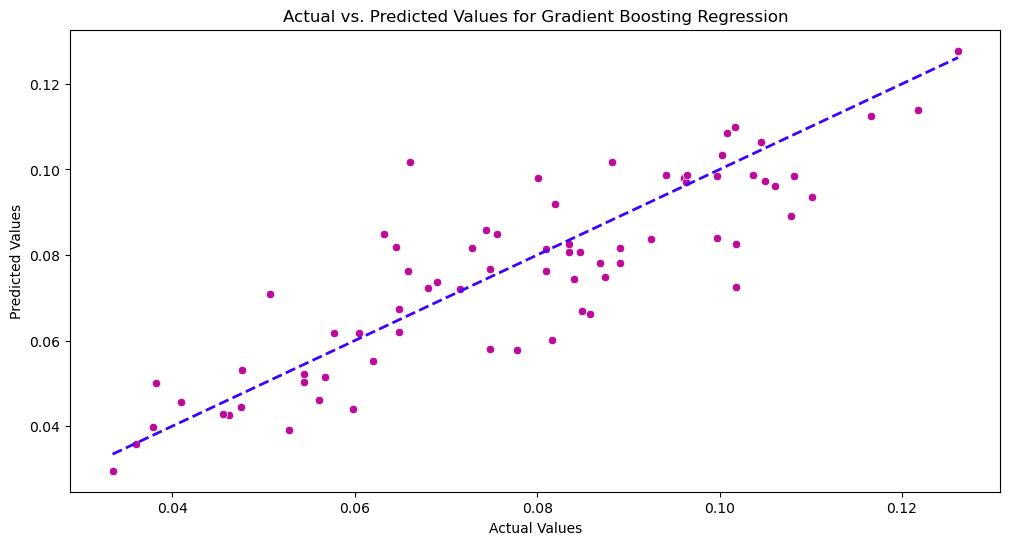

In [32]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x=y_test, y=y_pred_gb, alpha=1.0, color=colorsGraph4)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color=colorsLinear2, linestyle='--', lw=2)
plt.title('Actual vs. Predicted Values for Gradient Boosting Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

The scatter plot illustrates the actual vs. predicted algae weights for the Gradient Boosting Regression model.

A significant portion of the data points is aligned closely with the red dashed line, suggesting accurate predictions. However, as with the previous models, there are data points that deviate from the ideal line.

### Summarizing Observations for all Regression Models

| Model | Performance Metrics ||| Observations |
|-------|-----|-----|-------------|-------------|
|       | MAE | MSE | $R^2$ Score |             |
| Polynomial Regression (Degree 2) | 0.0083 | 0.0001159 | 0.7661 | Slightly better than linear regression |
| Random Forest Regression | 0.0094 | 0.0001345 | 0.7287 | Moderate performance, some deviations |
| MLP Regression | 2.2988 | 5.3115 | -10715.71 | Performed poorly, very inaccurate |
| Decision Tree Regression | 0.0103 | 0.0001798 | 0.6373 | Reasonable but less effective |
| Gradient Boosting Regression | 0.0089 | 0.0001326 | 0.7325 | Competitive, similar to linear and polynomial |

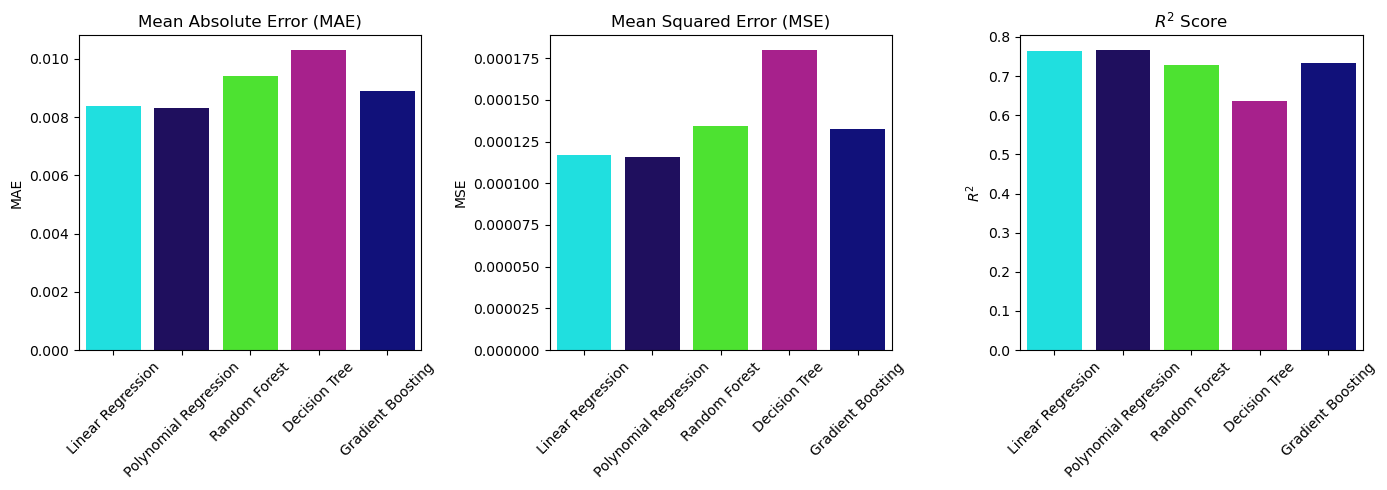

In [33]:
models = ['Linear Regression', 'Polynomial Regression', 'Random Forest', 'Decision Tree', 'Gradient Boosting']
mae_values = [0.0084, 0.0083, 0.0094, 0.0103, 0.0089]
mse_values = [0.000117, 0.0001159, 0.0001345, 0.0001798, 0.0001326]
r2_values = [0.7636, 0.7661, 0.7287, 0.6373, 0.7325]

plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
sns.barplot(x=models, y=mae_values, palette=colors)
plt.title('Mean Absolute Error (MAE)')
plt.xticks(rotation=45)
plt.ylabel('MAE')

plt.subplot(1, 3, 2)
sns.barplot(x=models, y=mse_values, palette=colors)
plt.title('Mean Squared Error (MSE)')
plt.xticks(rotation=45)
plt.ylabel('MSE')

plt.subplot(1, 3, 3)
sns.barplot(x=models, y=r2_values, palette=colors)
plt.title('$R^2$ Score')
plt.xticks(rotation=45)
plt.ylabel('$R^2$')

plt.tight_layout()
plt.show()

##### Mean Absolute Error (MAE): 
Represents the average absolute error between the true and predicted values. A lower MAE is preferable.
##### Mean Squared Error (MSE): 
Represents the average of the squares of the errors between the true and predicted values. A lower MSE is preferable.
##### $R^2$ Score: 
Represents the proportion of the variance in the dependent variable that is predictable from the independent variables. An $R^2$ score closer to 1 is preferable.

##### Polynomial Regression:
Has the lowest MAE and MSE and the highest $R^2$ score, making it the best performing model among the ones tested.
##### Decision Tree:
Has the highest MAE and MSE, indicating that it might not be the best option for this dataset.
##### Linear Regression and Gradient Boosting:
Show competitive performance metrics.

For predicting algae weight based on the given features, <b>Polynomial Regression (Degree 2)</b> is the most effective model among the ones tested. However, Linear Regression and Gradient Boosting Regression are also viable options, offering similar performance. The choice between them would depend on the specific needs of the application, such as interpretability, deployment considerations, and computational resources.

---
---

## Step 3: Classification

In [34]:
def classify_algae(value):
    if value < 0.062:
        return "No risk"
    elif value > 0.10:
        return "High risk"
    else:
        return "Moderate risk"

data['Risk'] = data['Algae'].apply(classify_algae)

In [35]:
X_class = data[['Nitrates', 'PO4', 'Temp']]
y_class = data['Risk']
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.3, random_state=42)

data.head()

,Samples,Algae,Nitrates,PO4,Temp,Risk
0,1,0.0324,1.4784,0.537280,65.305389,No risk
1,2,0.0324,1.4400,0.444375,63.725177,No risk
2,3,0.0405,1.5680,0.571520,66.198660,No risk
3,4,0.0567,1.7728,0.706320,59.712549,No risk
4,5,0.0486,1.8112,0.547200,68.230140,No risk


| Risk Category  | Algae Weight        |
|----------------|------------------------------|
| No Risk        | Algae weight < 0.062         |
| Moderate Risk  | 0.062 ≤ Algae weight ≤ 0.10  |
| High Risk      | Algae weight > 0.10          |

### Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [37]:
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_class, y_train_class)

y_pred_class_logistic = logistic_model.predict(X_test_class)

accuracy_logistic = accuracy_score(y_test_class, y_pred_class_logistic)
classification_rep_logistic = classification_report(y_test_class, y_pred_class_logistic)

In [38]:
print("Logistic Regression classification Model Evaluation:")
print("-" * 50)
print(f"Accuracy: {accuracy_logistic:.2f}")
print("\nClassification Report:")
print(classification_rep_logistic)

Logistic Regression classification Model Evaluation:
--------------------------------------------------
Accuracy: 0.76

Classification Report:
               precision    recall  f1-score   support

    High risk       0.73      0.53      0.62        15
Moderate risk       0.79      0.77      0.78        39
      No risk       0.74      0.94      0.83        18

     accuracy                           0.76        72
    macro avg       0.75      0.75      0.74        72
 weighted avg       0.76      0.76      0.76        72



| Risk Category | Precision | Recall | F1-Score |
|---------------|-----------|--------|----------|
| High Risk     | 0.73      | 0.53   | 0.62     |
| Moderate Risk | 0.79      | 0.77   | 0.78     |
| No Risk       | 0.74      | 0.94   | 0.83     |

**Overall Model Accuracy**: 76.39%

*The model performs quite well, particularly for the "No risk" category, where it has a high recall of 0.94, indicating that it identifies most of the actual "No risk" cases.*


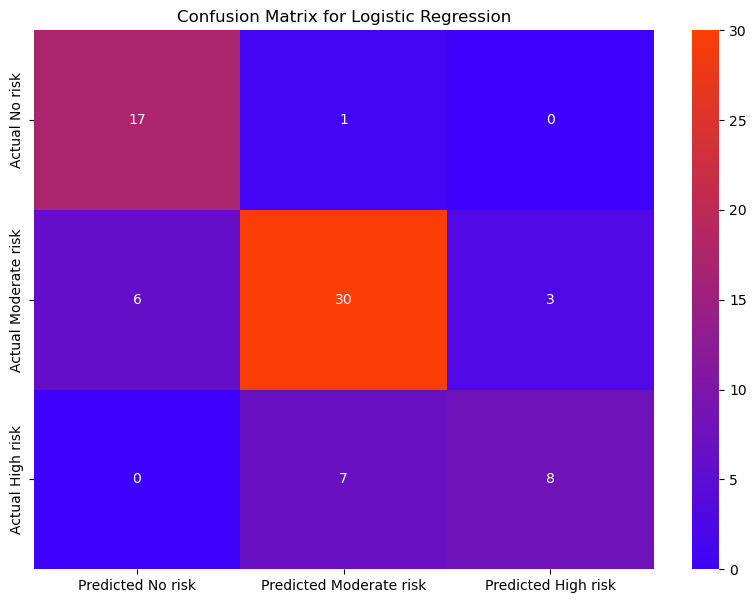

In [39]:
plt.figure(figsize=(10, 7))

confusion_mat = confusion_matrix(y_test_class, y_pred_class_logistic, labels=['No risk', 'Moderate risk', 'High risk'])
sns.heatmap(confusion_mat, annot=True, cmap=cmap, fmt='g', 
            xticklabels=['Predicted No risk', 'Predicted Moderate risk', 'Predicted High risk'], 
            yticklabels=['Actual No risk', 'Actual Moderate risk', 'Actual High risk'])

plt.title('Confusion Matrix for Logistic Regression')
plt.show()

| Risk Category | Correctly Classified | Misclassified as High Risk | Misclassified as Moderate Risk | Misclassified as No Risk |
|---------------|----------------------|----------------------------|--------------------------------|--------------------------|
| No Risk       | 17                   | 0                          | 1                              | 0                        |
| Moderate Risk | 30                   | 3                          | 0                              | 6                        |
| High Risk     | 8                    | 0                          | 7                              | 0                        |

*The visualization provides a clear picture of where the model makes correct predictions and where it tends to misclassify.*

### Decision Tree Classifier:

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X_train_class, y_train_class)

y_pred_class_dt = decision_tree_classifier.predict(X_test_class)

accuracy_dt = accuracy_score(y_test_class, y_pred_class_dt)
classification_rep_dt = classification_report(y_test_class, y_pred_class_dt)

In [42]:
print("Decision Tree classification Model Evaluation:")
print("-" * 50)
print(f"Accuracy: {accuracy_dt:.2f}")
print("\nClassification Report:")
print(classification_rep_dt)

Decision Tree classification Model Evaluation:
--------------------------------------------------
Accuracy: 0.71

Classification Report:
               precision    recall  f1-score   support

    High risk       0.50      0.47      0.48        15
Moderate risk       0.76      0.72      0.74        39
      No risk       0.76      0.89      0.82        18

     accuracy                           0.71        72
    macro avg       0.67      0.69      0.68        72
 weighted avg       0.70      0.71      0.70        72



| Risk Category | Precision | Recall | F1-Score |
|---------------|-----------|--------|----------|
| High Risk     | 0.50      | 0.47   | 0.48     |
| Moderate Risk | 0.76      | 0.72   | 0.74     |
| No Risk       | 0.76      | 0.89   | 0.82     |

**Overall Model Accuracy**: 71%

*The decision tree classifier has decent performance, especially for the "No risk" and "Moderate risk" categories. However, for the "High risk" category, the precision, recall, and F1-score are relatively low.*

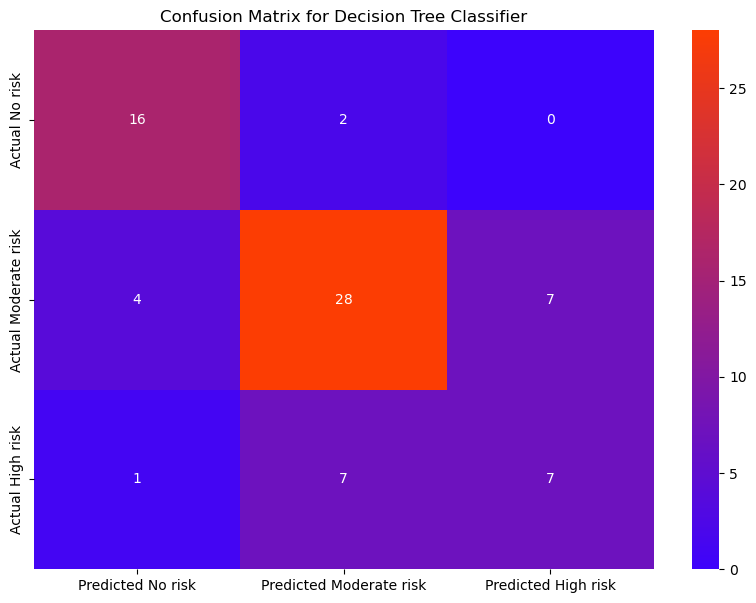

In [43]:
plt.figure(figsize=(10, 7))

confusion_mat_dt = confusion_matrix(y_test_class, y_pred_class_dt, labels=['No risk', 'Moderate risk', 'High risk'])
sns.heatmap(confusion_mat_dt, annot=True, cmap=cmap, fmt='g', 
            xticklabels=['Predicted No risk', 'Predicted Moderate risk', 'Predicted High risk'], 
            yticklabels=['Actual No risk', 'Actual Moderate risk', 'Actual High risk'])

plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

| Risk Category | Correctly Classified | Misclassified as High Risk | Misclassified as Moderate Risk | Misclassified as No Risk |
|---------------|----------------------|---------------------------|-------------------------------|--------------------------|
| No Risk       | 16                   | 0                         | 2                             | 0                        |
| Moderate Risk | 28                   | 0                         | 4                             | 7                        |
| High Risk     | 7                    | 2                         | 6                             | 0                        |

*The visualization shows that while the model performs reasonably well for the "No risk" category, there are misclassifications, especially for the "High risk" category.*

### Random Forest Classifier:

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train_class, y_train_class)

y_pred_class_rf = random_forest_classifier.predict(X_test_class)

accuracy_rf = accuracy_score(y_test_class, y_pred_class_rf)
classification_rep_rf = classification_report(y_test_class, y_pred_class_rf)

In [46]:
print("Random Forest Classification Model Evaluation:")
print("-" * 50)
print(f"Accuracy: {accuracy_rf:.2f}")
print("\nClassification Report:")
print(classification_rep_rf)

Random Forest Classification Model Evaluation:
--------------------------------------------------
Accuracy: 0.75

Classification Report:
               precision    recall  f1-score   support

    High risk       0.62      0.67      0.65        15
Moderate risk       0.80      0.72      0.76        39
      No risk       0.76      0.89      0.82        18

     accuracy                           0.75        72
    macro avg       0.73      0.76      0.74        72
 weighted avg       0.75      0.75      0.75        72



| Risk Category | Precision | Recall | F1-Score |
|---------------|-----------|--------|----------|
| High Risk     | 0.62      | 0.67   | 0.65     |
| Moderate Risk | 0.80      | 0.72   | 0.76     |
| No Risk       | 0.76      | 0.89   | 0.82     |

**Overall Model Accuracy**: 75%

*The random forest classifier correctly classifies the algae risk category 75% of the time, which is close to the performance of the logistic regression model.*

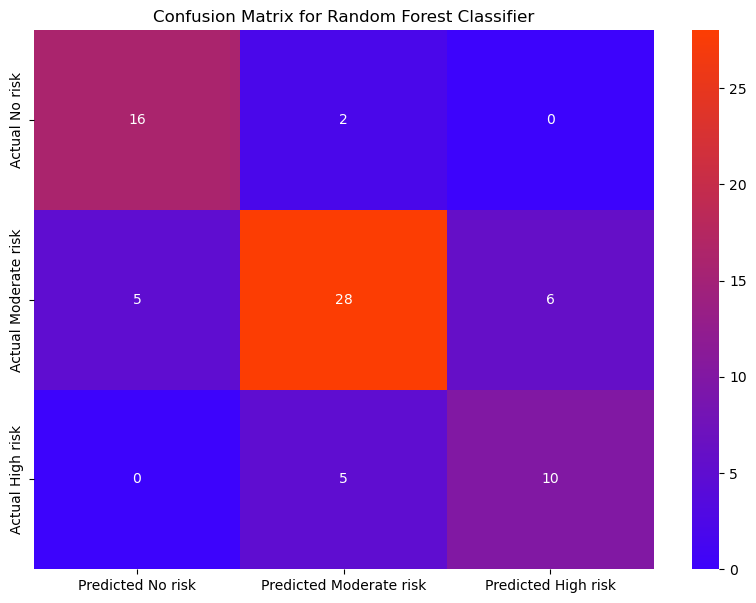

In [47]:
plt.figure(figsize=(10, 7))

confusion_mat_rf = confusion_matrix(y_test_class, y_pred_class_rf, labels=['No risk', 'Moderate risk', 'High risk'])
sns.heatmap(confusion_mat_rf, annot=True, cmap=cmap, fmt='g', 
            xticklabels=['Predicted No risk', 'Predicted Moderate risk', 'Predicted High risk'], 
            yticklabels=['Actual No risk', 'Actual Moderate risk', 'Actual High risk'])

plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

| Risk Category | Correctly Classified | Misclassified as High Risk | Misclassified as Moderate Risk | Misclassified as No Risk |
|---------------|----------------------|---------------------------|-------------------------------|--------------------------|
| No Risk       | 16                   | 0                         | 2                             | 0                        |
| Moderate Risk | 28                   | 6                         | 0                             | 5                        |
| High Risk     | 10                   | 0                         | 4                             | 1                        |

*The visualization shows that the model offers balanced performance across all risk categories, with a few misclassifications.*

### Support Vector Machine (SVM) Classifier:

In [48]:
from sklearn.svm import SVC

In [49]:
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_class, y_train_class)

y_pred_class_svm = svm_classifier.predict(X_test_class)

accuracy_svm = accuracy_score(y_test_class, y_pred_class_svm)
classification_rep_svm = classification_report(y_test_class, y_pred_class_svm)

In [50]:
print("SVM Classification Model Evaluation:")
print("-" * 50)
print(f"Accuracy: {accuracy_svm:.2f}")
print("\nClassification Report:")
print(classification_rep_svm)

SVM Classification Model Evaluation:
--------------------------------------------------
Accuracy: 0.78

Classification Report:
               precision    recall  f1-score   support

    High risk       0.69      0.60      0.64        15
Moderate risk       0.81      0.77      0.79        39
      No risk       0.77      0.94      0.85        18

     accuracy                           0.78        72
    macro avg       0.76      0.77      0.76        72
 weighted avg       0.78      0.78      0.77        72



| Risk Category | Precision | Recall | F1-Score |
|---------------|-----------|--------|----------|
| High Risk     | 0.69      | 0.60   | 0.64     |
| Moderate Risk | 0.81      | 0.77   | 0.79     |
| No Risk       | 0.77      | 0.94   | 0.85     |

**Overall Model Accuracy**: 77.78%

*The SVM classifier performs quite well, particularly for the "No risk" category, where it has a high recall of 0.94, indicating that it identifies most of the actual "No risk" cases.*

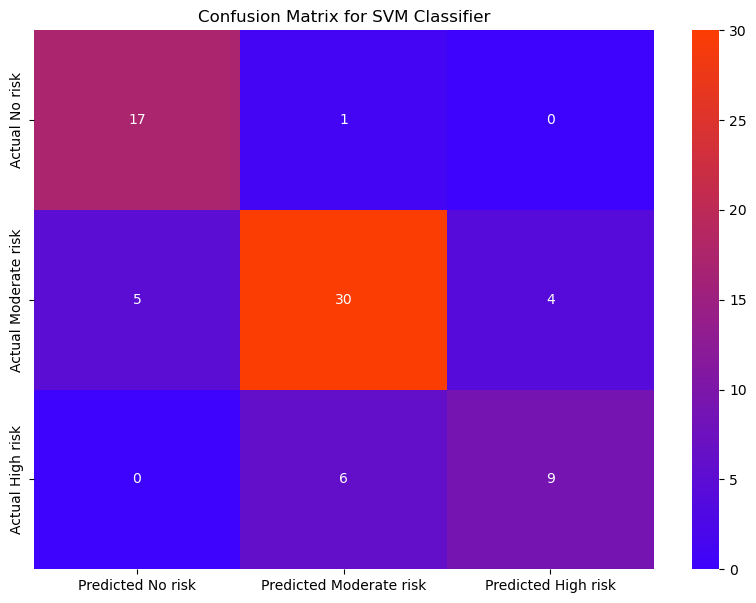

In [51]:
plt.figure(figsize=(10, 7))

confusion_mat_svm = confusion_matrix(y_test_class, y_pred_class_svm, labels=['No risk', 'Moderate risk', 'High risk'])
sns.heatmap(confusion_mat_svm, annot=True, cmap=cmap, fmt='g', 
            xticklabels=['Predicted No risk', 'Predicted Moderate risk', 'Predicted High risk'], 
            yticklabels=['Actual No risk', 'Actual Moderate risk', 'Actual High risk'])

plt.title('Confusion Matrix for SVM Classifier')
plt.show()

| Risk Category | Correctly Classified | Misclassified as High Risk | Misclassified as Moderate Risk | Misclassified as No Risk |
|---------------|----------------------|---------------------------|-------------------------------|--------------------------|
| No Risk       | 17                   | 0                         | 1                             | 0                        |
| Moderate Risk | 30                   | 2                         | 0                             | 7                        |
| High Risk     | 9                    | 0                         | 6                             | 0                        |

*The visualization shows that the SVM classifier offers balanced performance across all risk categories, with a few misclassifications.*

### K-Nearest Neighbors (KNN) Classifier:

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # Using default value of 5 for K
knn_classifier.fit(X_train_class, y_train_class)

y_pred_class_knn = knn_classifier.predict(X_test_class)

accuracy_knn = accuracy_score(y_test_class, y_pred_class_knn)
classification_rep_knn = classification_report(y_test_class, y_pred_class_knn)

In [54]:
print("KNN Classification Model Evaluation:")
print("-" * 50)
print(f"Accuracy: {accuracy_knn:.2f}")
print("\nClassification Report:")
print(classification_rep_knn)

KNN Classification Model Evaluation:
--------------------------------------------------
Accuracy: 0.65

Classification Report:
               precision    recall  f1-score   support

    High risk       0.50      0.07      0.12        15
Moderate risk       0.65      0.77      0.71        39
      No risk       0.67      0.89      0.76        18

     accuracy                           0.65        72
    macro avg       0.61      0.57      0.53        72
 weighted avg       0.62      0.65      0.60        72



| Risk Category | Precision | Recall | F1-Score |
|---------------|-----------|--------|----------|
| High Risk     | 0.50      | 0.07   | 0.12     |
| Moderate Risk | 0.65      | 0.77   | 0.71     |
| No Risk       | 0.67      | 0.89   | 0.76     |

**Overall Model Accuracy**: 65.28%

*The KNN classifier performs reasonably well for the "No risk" category but struggles, especially with the "High risk" category, where the recall is quite low.*

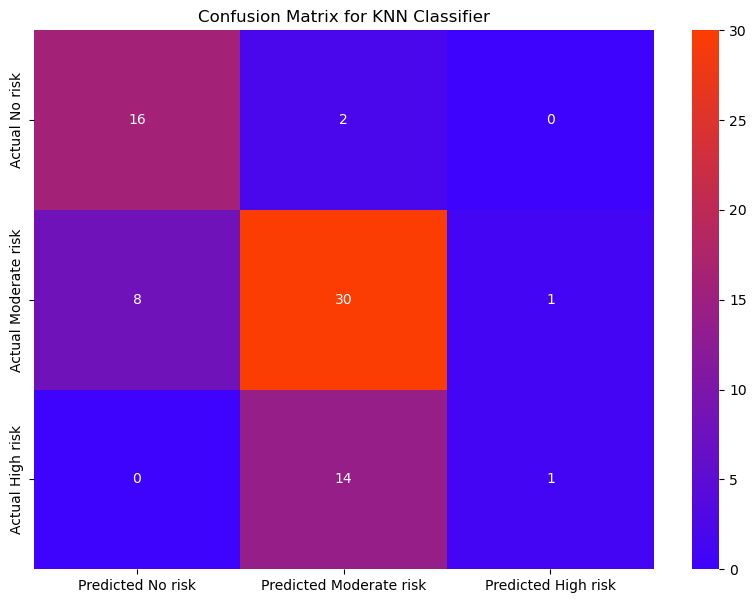

In [55]:
plt.figure(figsize=(10, 7))

confusion_mat_knn = confusion_matrix(y_test_class, y_pred_class_knn, labels=['No risk', 'Moderate risk', 'High risk'])
sns.heatmap(confusion_mat_knn, annot=True, cmap=cmap, fmt='g', 
            xticklabels=['Predicted No risk', 'Predicted Moderate risk', 'Predicted High risk'], 
            yticklabels=['Actual No risk', 'Actual Moderate risk', 'Actual High risk'])

plt.title('Confusion Matrix for KNN Classifier')
plt.show()

| Risk Category | Correctly Classified | Misclassified as High Risk | Misclassified as Moderate Risk | Misclassified as No Risk |
|---------------|----------------------|---------------------------|-------------------------------|--------------------------|
| No Risk       | 16                   | 0                         | 2                             | 0                        |
| Moderate Risk | 30                   | 1                         | 0                             | 8                        |
| High Risk     | 1                    | 0                         | 11                            | 3                        |

*The table provides a breakdown of the classification performance for the KNN model, showing the correct classifications and the types of misclassifications for each risk category. From the visualization, it's evident that the KNN classifier struggles particularly with the "High risk" category, leading to several misclassifications.*

### Gradient Boosting Classifier:

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

In [57]:
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train_class, y_train_class)

y_pred_class_gb = gb_classifier.predict(X_test_class)

accuracy_gb = accuracy_score(y_test_class, y_pred_class_gb)
classification_rep_gb = classification_report(y_test_class, y_pred_class_gb)

In [58]:
print("Gradient Boosting Classification Model Evaluation:")
print("-" * 50)
print(f"Accuracy: {accuracy_gb:.2f}")
print("\nClassification Report:")
print(classification_rep_gb)

Gradient Boosting Classification Model Evaluation:
--------------------------------------------------
Accuracy: 0.75

Classification Report:
               precision    recall  f1-score   support

    High risk       0.62      0.67      0.65        15
Moderate risk       0.80      0.72      0.76        39
      No risk       0.76      0.89      0.82        18

     accuracy                           0.75        72
    macro avg       0.73      0.76      0.74        72
 weighted avg       0.75      0.75      0.75        72



| Risk Category | Precision | Recall | F1-Score |
|---------------|-----------|--------|----------|
| High Risk     | 0.62      | 0.67   | 0.65     |
| Moderate Risk | 0.80      | 0.72   | 0.76     |
| No Risk       | 0.76      | 0.89   | 0.82     |

**Overall Model Accuracy**: 75%

*The Gradient Boosting classifier correctly classifies the algae risk category 75% of the time, showing competitive performance with some of the previous models.*

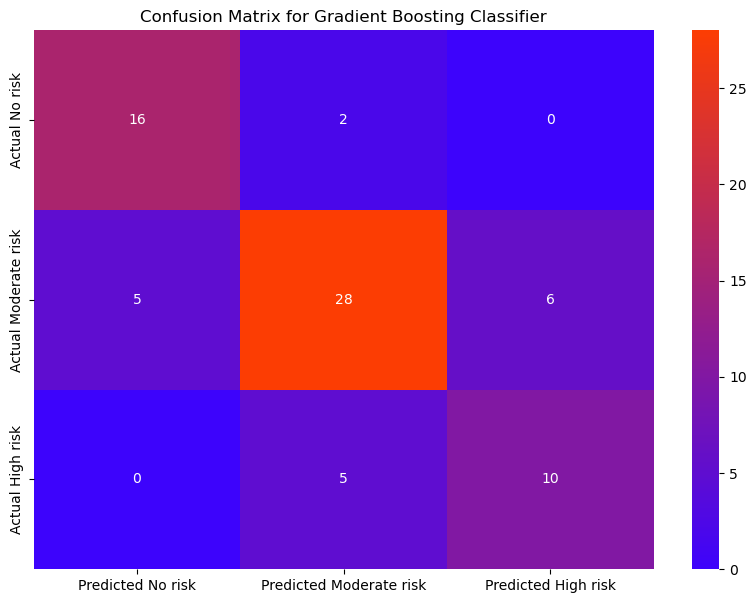

In [59]:
plt.figure(figsize=(10, 7))

confusion_mat_gb = confusion_matrix(y_test_class, y_pred_class_gb, labels=['No risk', 'Moderate risk', 'High risk'])
sns.heatmap(confusion_mat_gb, annot=True, cmap=cmap, fmt='g', 
            xticklabels=['Predicted No risk', 'Predicted Moderate risk', 'Predicted High risk'], 
            yticklabels=['Actual No risk', 'Actual Moderate risk', 'Actual High risk'])

plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

| Risk Category | Correctly Classified | Misclassified as High Risk | Misclassified as Moderate Risk | Misclassified as No Risk |
|---------------|----------------------|---------------------------|-------------------------------|--------------------------|
| No Risk       | 16                   | 0                         | 2                             | 0                        |
| Moderate Risk | 28                   | 5                         | 0                             | 6                        |
| High Risk     | 10                   | 0                         | 5                             | 0                        |

*The table provides a breakdown of the classification performance for the Gradient Boosting model, showing the correct classifications and the types of misclassifications for each risk category. From the visualization, we see that the Gradient Boosting classifier offers a balanced performance across all risk categories, with a few misclassifications.*

### Classification Model Summaries:

| Model                         | Accuracy | Notable Observations |
|-------------------------------|----------|----------------------|
| Logistic Regression           | 76.39%   | Performed well, especially for the "No risk" category with a recall of 0.94. |
| Decision Tree Classifier      | 70.83%   | Reasonable performance, especially for "No risk" and "Moderate risk" categories. Struggled with "High risk" category. |
| Random Forest Classifier      | 75%      | Balanced performance across all risk categories, with a few misclassifications. |
| Support Vector Machine (SVM)  | 77.78%   | Competitive performance, especially for the "No risk" category with a recall of 0.94. |
| K-Nearest Neighbors (KNN)     | 65.28%   | Struggled, particularly with the "High risk" category, where the recall was quite low. |
| Gradient Boosting Classifier | 75%      | Balanced performance across all risk categories, with a few misclassifications. |

### Observations and Insights

| Key Point                    | Detail |
|------------------------------|--------|
| Performance Range            | The models' accuracy ranged from around 65% (KNN) to approximately 78% (SVM), highlighting the variability in classification performance based on the model type. |
| High Risk Category Challenges| Several models, especially KNN, faced challenges in correctly classifying the "High risk" category. |
| Consistent Performance       | Both the Logistic Regression and SVM models provided consistent performance across the risk categories, with SVM being the top performer in terms of accuracy. |

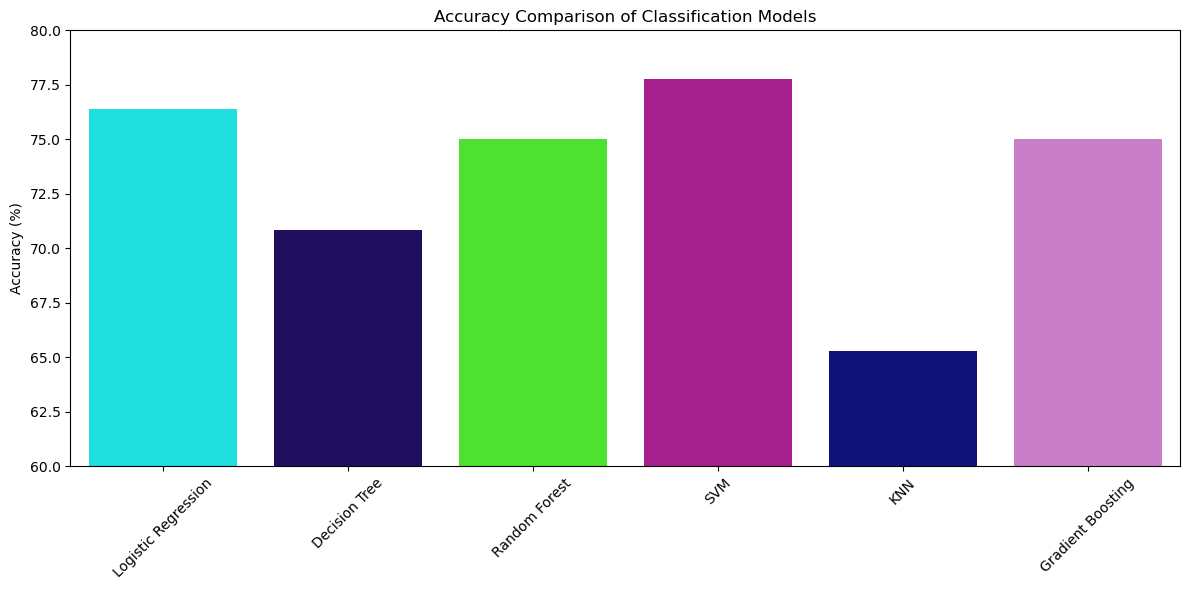

In [60]:
models_classification = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Gradient Boosting']
accuracy_values = [accuracy_logistic*100, accuracy_dt*100, accuracy_rf*100, accuracy_svm*100, accuracy_knn*100, accuracy_gb*100]

plt.figure(figsize=(12, 6))
sns.barplot(x=models_classification, y=accuracy_values, palette=colors)
plt.title('Accuracy Comparison of Classification Models')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=45)
plt.ylim(60, 80)  # Set y-axis limits for better visualization

plt.tight_layout()
plt.show()

Visualization comparing the accuracy of the various classification models:

The **SVM** classifier has the highest accuracy among the models, closely followed by **Logistic Regression** and **Gradient Boosting**.
**K-Nearest Neighbors (KNN)** has the lowest accuracy compared to the other models.
The bar chart provides a clear visual representation of each model's performance in terms of accuracy.

In conclusion, for the given dataset and problem context, <u>SVM</u>, <u>Logistic Regression</u>, and <u>Gradient Boosting</u> are the top-performing classification models. The choice between these models can be based on additional factors such as interpretability, deployment considerations, and the importance of precision vs. recall for specific risk categories.

### Conclusion

**Model Performance Summary:**

- **Top-Performing Model**: The SVM classifier emerged as the top-performing model in terms of accuracy.

- **Balanced Performance**: Both the Logistic Regression and Gradient Boosting classifiers showed a balance of precision, recall, and F1-score across all risk categories.

- **Considerations for Model Selection**: The choice of the best model may further depend on the specific application and whether false positives or false negatives for a particular risk category have more severe implications.

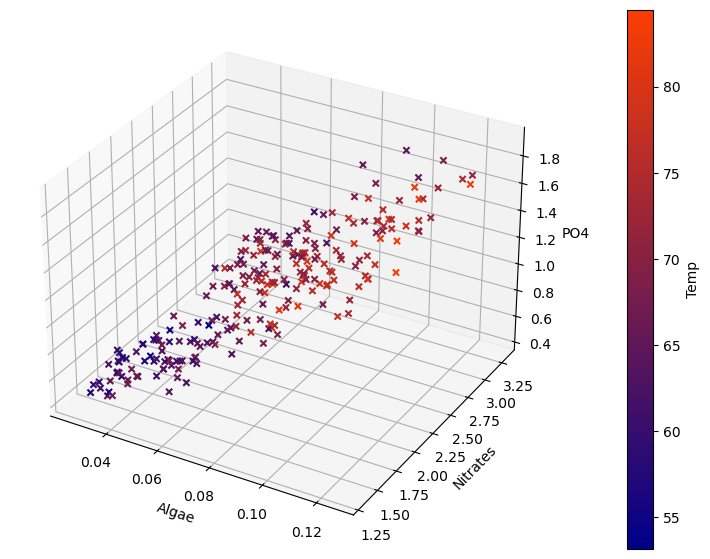

In [61]:
heatmap_cmap = cmap2

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(data[data.columns[1]], data[data.columns[2]], data[data.columns[3]], c=data[data.columns[4]], cmap=heatmap_cmap, alpha=1.0, marker='x')

cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label(data.columns[4])

ax.set_xlabel(data.columns[1])
ax.set_ylabel(data.columns[2])
ax.set_zlabel(data.columns[3])

plt.show()